In [1]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pymysql as pms
db = pms.connect("140.118.126.136", "123", "1234567890", "test",cursorclass=pms.cursors.DictCursor)
cursor = db.cursor()

cursor.execute("select * from btc_usd order by DATE DESC")
result = cursor.fetchall()
btc_data = pd.DataFrame(result)
btc_data = btc_data.assign(DATE=pd.to_datetime(btc_data['DATE']))
btc_data['VOLUME'] = (pd.to_numeric(btc_data['VOLUME'], errors='coerce').fillna(0))
btc_data['VOLUME'] = btc_data['VOLUME'].astype('int64')
btc_data

,ASK,BID,DATE,HIGH,LAST,LOW,MID,VOLUME
0,7578.000,7577.900,2018-05-23,8027.660,7577.90,7402.700,7577.950,41263
1,7985.000,7984.300,2018-05-22,8421.000,7984.30,7978.000,7984.650,18651
2,8370.400,8370.300,2018-05-21,8644.000,8370.30,8309.100,8370.350,17177
3,8496.000,8495.900,2018-05-20,8597.900,8496.00,8171.500,8495.950,15679
4,8206.700,8206.600,2018-05-19,8468.000,8206.70,8140.200,8206.650,13967
5,8209.600,8209.500,2018-05-18,8277.200,8202.10,7925.000,8209.550,24019
6,8078.000,8077.900,2018-05-17,8482.200,8077.80,7982.500,8077.950,24936
7,8290.300,8290.200,2018-05-16,8498.400,8290.30,8100.000,8290.250,32261
8,9233.100,9233.000,2018-05-08,9471.000,9233.00,9045.300,9233.050,25092
9,9289.700,9289.600,2018-05-07,9677.900,9289.70,9182.700,9289.650,25627


In [2]:
#def some fun tp process data
def add_newcol(btc_data): #新增closeoffhigh和volatolity欄位，增加模型訓練的準確度
    market_info = btc_data[btc_data['DATE']>='2017-01-01'] #將資料只獲取從2017-01-01之後的內容，存到 market_info
    kwargs = { 'CLOSE_OFF_HIGH': lambda x: 2*(x['HIGH'] - x['LAST']) / (x['HIGH'] - x['LOW']) - 1,
          'VOLATILITY': lambda x: (x['HIGH'] - x['LOW']) / (x['MID'])} 
    market_info = market_info.assign(**kwargs)
    return market_info
def create_model_data(btc_data):#選取待會訓練模型所需要的資料
    model_data = btc_data[["DATE"]+["LAST"]+["VOLUME"]+["CLOSE_OFF_HIGH"]+["VOLATILITY"]]
    model_data = model_data.sort_values(by='DATE')
    return model_data
def create_input_data(data,window_len):#決定訓練時以多少天的大小作訓練(window_len)，以每個為window_len大小的array，作為待會訓練模型的input
    norm_cols = ['LAST','VOLUME']
    inputs = [] #將Close,Volume以每筆的第一個資料來作正規化，讓值介於-1,1之間
    for i in range(len(data)-window_len):
        temp_set = data[i:(i+window_len)].copy()
        for col in norm_cols:
            temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1 
        inputs.append(temp_set)
    return inputs
def create_output_data(data,window_len):#模型的輸出
    return (data['LAST'][window_len:].values / data['LAST'][:-window_len].values) - 1
def data_to_np(data):#原本資料的型態為dataframe，這裡將型態轉為numpy array，模型的資料是以這種型態為主
    data = [np.array(datas)for datas in data]
    data = np.array(data)
    return data

In [3]:
market_info = add_newcol(btc_data)
market_info.head()

,ASK,BID,DATE,HIGH,LAST,LOW,MID,VOLUME,CLOSE_OFF_HIGH,VOLATILITY
0,7578.0,7577.9,2018-05-23,8027.66,7577.9,7402.7,7577.95,41263,0.439324,0.082471
1,7985.0,7984.3,2018-05-22,8421.00,7984.3,7978.0,7984.65,18651,0.971558,0.055481
2,8370.4,8370.3,2018-05-21,8644.00,8370.3,8309.1,8370.35,17177,0.634518,0.040010
3,8496.0,8495.9,2018-05-20,8597.90,8496.0,8171.5,8495.95,15679,-0.522045,0.050189
4,8206.7,8206.6,2018-05-19,8468.00,8206.7,8140.2,8206.65,13967,0.594265,0.039943


In [4]:
model_data = create_model_data(market_info)
model_data.head()

,DATE,LAST,VOLUME,CLOSE_OFF_HIGH,VOLATILITY
486,2017-01-01,966.61,7147,-0.862872,0.023982
485,2017-01-02,999.24,13440,-0.679045,0.045317
484,2017-01-03,1019.50,21804,-0.242054,0.040120
483,2017-01-04,1038.00,14128,-0.849057,0.025518
482,2017-01-05,1139.60,53698,-0.816901,0.099767


In [5]:
split_date = '2017-06-01' #將training_set,test_set從這個日期做劃分
training_set, test_set = model_data[model_data['DATE']<split_date], model_data[model_data['DATE']>=split_date]
test_set.head()

,DATE,LAST,VOLUME,CLOSE_OFF_HIGH,VOLATILITY
341,2017-06-01,2287.80,19095,-0.145454,0.082248
340,2017-06-02,2390.00,11467,-1.000000,0.053223
339,2017-06-03,2477.20,11912,-0.940120,0.053942
338,2017-06-04,2476.20,11862,-0.672180,0.053756
337,2017-06-05,2618.91,15069,-0.654740,0.067679


In [6]:
training_set = training_set.drop('DATE', 1) #將Date的欄位刪掉，因為之後不會需要用到它，因為後面要將形式轉為np array，故只留數值的部分
test_set = test_set.drop('DATE', 1)

In [7]:
window_len = 10 #決定模型要獲取幾天前的數據，隨意選擇
norm_cols = ['LAST','VOLUME']
LSTM_training_inputs = create_input_data(training_set,10)
LSTM_test_inputs = create_input_data(test_set,10)
LSTM_training_outputs = create_output_data(training_set,10)

In [8]:
LSTM_training_outputs.shape

(135,)

In [9]:
#以 np array的形式做處理，當存以數字的形式
LSTM_training_inputs = data_to_np(LSTM_training_inputs)
LSTM_test_inputs = data_to_np(LSTM_test_inputs)
LSTM_training_outputs = data_to_np(LSTM_training_outputs)

In [10]:
LSTM_training_inputs.shape

(135, 10, 4)

In [11]:
LSTM_training_outputs.shape

(135,)

In [12]:
LSTM_training_outputs

array([-0.06296231, -0.21984708, -0.21040706, -0.20306358, -0.28409091,
       -0.18204106, -0.07612688, -0.00452593, -0.03030899, -0.00160574,
       -0.01060999,  0.18530966,  0.14749252,  0.09522255,  0.08653552,
        0.08846894,  0.10272256,  0.01405989,  0.03523093,  0.01218998,
        0.02367934,  0.04564836,  0.06473823,  0.1114913 ,  0.14716002,
        0.15419488,  0.09966462,  0.11552307,  0.14429592,  0.14941647,
        0.07372242,  0.02772718,  0.01675614, -0.01092354, -0.0200413 ,
       -0.01726312,  0.00735148,  0.0155486 ,  0.0045623 ,  0.01039184,
        0.07229515,  0.09860119,  0.1296    ,  0.1311245 ,  0.19485811,
        0.16964374,  0.13708087,  0.13500241,  0.1315167 ,  0.12200415,
        0.16909676,  0.15262627,  0.14173159,  0.12462276,  0.07365415,
        0.07931151,  0.0687771 , -0.02434886, -0.00468267, -0.06366159,
       -0.05077745, -0.02624463, -0.19143987, -0.11886346, -0.19477472,
       -0.19824891, -0.23915443, -0.16515652, -0.19650508, -0.06

In [13]:
# import the relevant Keras modules

#開始建造LSTM模型
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

#neurons=神經元個數(可自訂),epochs=訓練的次數,lose.optimizer都可更改(但結果以這兩個最好)
def build_model1(inputs, output_size, neurons, activ_func="linear",
                dropout=0.25, loss="mse", optimizer="adam"):
    model = Sequential()
    
    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))
    
    #outputlayer
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer,metrics=['accuracy'])
    return model

E:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [14]:
# random seed for reproducibility
np.random.seed(202)
# initialise model architecture
bt_model = build_model1(LSTM_training_inputs, output_size=1, neurons = 20)
# train model on data
# note: eth_history contains information on the training error per epoch
bt_history = bt_model.fit(LSTM_training_inputs, 
                            LSTM_training_outputs, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)
# #eth_model.save('eth_model%d.h5'%j)

Epoch 1/50
 - 3s - loss: 0.0316 - acc: 0.0000e+00
Epoch 2/50
 - 2s - loss: 0.0169 - acc: 0.0000e+00
Epoch 3/50
 - 2s - loss: 0.0109 - acc: 0.0000e+00
Epoch 4/50
 - 2s - loss: 0.0094 - acc: 0.0000e+00
Epoch 5/50
 - 2s - loss: 0.0070 - acc: 0.0000e+00
Epoch 6/50
 - 2s - loss: 0.0064 - acc: 0.0000e+00
Epoch 7/50
 - 2s - loss: 0.0065 - acc: 0.0000e+00
Epoch 8/50
 - 2s - loss: 0.0054 - acc: 0.0000e+00
Epoch 9/50
 - 2s - loss: 0.0069 - acc: 0.0000e+00
Epoch 10/50
 - 2s - loss: 0.0038 - acc: 0.0000e+00
Epoch 11/50
 - 2s - loss: 0.0032 - acc: 0.0000e+00
Epoch 12/50
 - 2s - loss: 0.0037 - acc: 0.0000e+00
Epoch 13/50
 - 2s - loss: 0.0041 - acc: 0.0000e+00
Epoch 14/50
 - 2s - loss: 0.0039 - acc: 0.0000e+00
Epoch 15/50
 - 2s - loss: 0.0027 - acc: 0.0000e+00
Epoch 16/50
 - 2s - loss: 0.0033 - acc: 0.0000e+00
Epoch 17/50
 - 2s - loss: 0.0026 - acc: 0.0000e+00
Epoch 18/50
 - 2s - loss: 0.0031 - acc: 0.0000e+00
Epoch 19/50
 - 2s - loss: 0.0026 - acc: 0.0000e+00
Epoch 20/50
 - 2s - loss: 0.0030 - acc: 

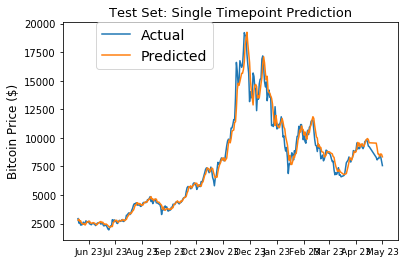

In [15]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(2017+j,i+1,23)for j in range(2) for i in range(12)])
ax1.set_xticklabels([datetime.date(2017+j,i+1,23).strftime('%b %d')for j in range(2)  for i in range(12)],fontsize=9)
ax1.plot(model_data[model_data['DATE']>= split_date]['DATE'][window_len:].astype(datetime.datetime),
         test_set['LAST'][window_len:], label='Actual')
ax1.plot(model_data[model_data['DATE']>= split_date]['DATE'][window_len:].astype(datetime.datetime),
         ((np.transpose(bt_model.predict(LSTM_test_inputs))+1) * test_set['LAST'].values[:-window_len])[0], 
         label='Predicted')
#ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(bt_model.predict(LSTM_test_inputs))+1)-\
#            (test_set['LAST'].values[window_len:])/(test_set['LAST'].values[:-window_len]))), 
#             xy=(0.75, 0.9),  xycoords='axes fraction',
#            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()

In [30]:
def build_model2(inputs, output_size, neurons, activ_func="tanh",
                dropout=0.25, loss="mse", optimizer="adam"):
    model = Sequential()
    model.add(LSTM(neurons, return_sequences=True, input_shape=(inputs.shape[1], inputs.shape[2]), activation=activ_func))
    model.add(Dropout(dropout))
    model.add(LSTM(neurons, return_sequences=True, activation=activ_func))
    model.add(Dropout(dropout))
    model.add(LSTM(neurons, activation=activ_func))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
    model.compile(loss=loss, optimizer=optimizer, metrics=['mae'])
    return model

In [31]:
# random seed for reproducibility
np.random.seed(202)
# initialise model architecture
bt_model = build_model2(LSTM_training_inputs, output_size=1, neurons = 512)
# train model on data
# note: eth_history contains information on the training error per epoch
bt_history = bt_model.fit(LSTM_training_inputs, 
                            LSTM_training_outputs, 
                            epochs=50, batch_size=128, verbose=2, shuffle=True)
# #eth_model.save('eth_model%d.h5'%j)

Epoch 1/50
 - 6s - loss: 0.0173 - mean_absolute_error: 0.1120
Epoch 2/50
 - 3s - loss: 0.0188 - mean_absolute_error: 0.1034
Epoch 3/50
 - 3s - loss: 0.0140 - mean_absolute_error: 0.0930
Epoch 4/50
 - 3s - loss: 0.0132 - mean_absolute_error: 0.0920
Epoch 5/50
 - 3s - loss: 0.0115 - mean_absolute_error: 0.0858
Epoch 6/50
 - 3s - loss: 0.0106 - mean_absolute_error: 0.0787
Epoch 7/50
 - 3s - loss: 0.0105 - mean_absolute_error: 0.0739
Epoch 8/50
 - 3s - loss: 0.0094 - mean_absolute_error: 0.0727
Epoch 9/50
 - 3s - loss: 0.0093 - mean_absolute_error: 0.0778
Epoch 10/50
 - 3s - loss: 0.0074 - mean_absolute_error: 0.0656
Epoch 11/50
 - 3s - loss: 0.0076 - mean_absolute_error: 0.0626
Epoch 12/50
 - 3s - loss: 0.0079 - mean_absolute_error: 0.0677
Epoch 13/50
 - 3s - loss: 0.0087 - mean_absolute_error: 0.0697
Epoch 14/50
 - 3s - loss: 0.0064 - mean_absolute_error: 0.0609
Epoch 15/50
 - 3s - loss: 0.0069 - mean_absolute_error: 0.0587
Epoch 16/50
 - 3s - loss: 0.0049 - mean_absolute_error: 0.0512
E

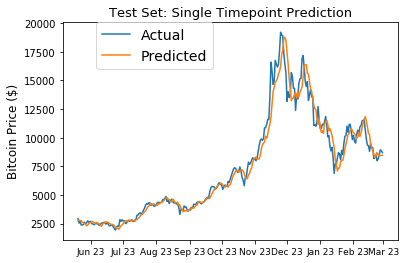

In [32]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(2017+j,i+1,23)for j in range(2) for i in range(12)])
ax1.set_xticklabels([datetime.date(2017+j,i+1,23).strftime('%b %d')for j in range(2)  for i in range(12)],fontsize=9)
ax1.plot(model_data[model_data['DATE']>= split_date]['DATE'][window_len:].astype(datetime.datetime),
         test_set['LAST'][window_len:], label='Actual')
ax1.plot(model_data[model_data['DATE']>= split_date]['DATE'][window_len:].astype(datetime.datetime),
         ((np.transpose(bt_model.predict(LSTM_test_inputs))+1) * test_set['LAST'].values[:-window_len])[0], 
         label='Predicted')
#ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(bt_model.predict(LSTM_test_inputs))+1)-\
#            (test_set['LAST'].values[window_len:])/(test_set['LAST'].values[:-window_len]))), 
#             xy=(0.75, 0.9),  xycoords='axes fraction',
#            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()

In [33]:
# random seed for reproducibility
np.random.seed(202)
# we'll try to predict the closing price for the next 5 days 
# change this value if you want to make longer/shorter prediction
pred_range = 5
# initialise model architecture
bt_model = build_model1(LSTM_training_inputs, output_size=pred_range, neurons = 20)
# model output is next 5 prices normalised to 10th previous closing price
LSTM_training_outputs = []
for i in range(window_len, len(training_set['LAST'])-pred_range):
    LSTM_training_outputs.append((training_set['LAST'][i:i+pred_range].values/
                                  training_set['LAST'].values[i-window_len])-1)
LSTM_training_outputs = np.array(LSTM_training_outputs)
# train model on data
# note: eth_history contains information on the training error per epoch
bt_history = bt_model.fit(LSTM_training_inputs[:-pred_range], LSTM_training_outputs, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)

Epoch 1/50
 - 3s - loss: 0.0286
Epoch 2/50
 - 1s - loss: 0.0184
Epoch 3/50
 - 1s - loss: 0.0130
Epoch 4/50
 - 1s - loss: 0.0099
Epoch 5/50
 - 1s - loss: 0.0088
Epoch 6/50
 - 1s - loss: 0.0078
Epoch 7/50
 - 1s - loss: 0.0074
Epoch 8/50
 - 1s - loss: 0.0063
Epoch 9/50
 - 1s - loss: 0.0061
Epoch 10/50
 - 1s - loss: 0.0057
Epoch 11/50
 - 1s - loss: 0.0058
Epoch 12/50
 - 1s - loss: 0.0050
Epoch 13/50
 - 2s - loss: 0.0048
Epoch 14/50
 - 1s - loss: 0.0046
Epoch 15/50
 - 1s - loss: 0.0050
Epoch 16/50
 - 1s - loss: 0.0049
Epoch 17/50
 - 1s - loss: 0.0047
Epoch 18/50
 - 1s - loss: 0.0044
Epoch 19/50
 - 2s - loss: 0.0047
Epoch 20/50
 - 1s - loss: 0.0044
Epoch 21/50
 - 2s - loss: 0.0048
Epoch 22/50
 - 2s - loss: 0.0040
Epoch 23/50
 - 2s - loss: 0.0042
Epoch 24/50
 - 2s - loss: 0.0041
Epoch 25/50
 - 2s - loss: 0.0039
Epoch 26/50
 - 2s - loss: 0.0041
Epoch 27/50
 - 1s - loss: 0.0041
Epoch 28/50
 - 1s - loss: 0.0043
Epoch 29/50
 - 1s - loss: 0.0039
Epoch 30/50
 - 1s - loss: 0.0041
Epoch 31/50
 - 1s -

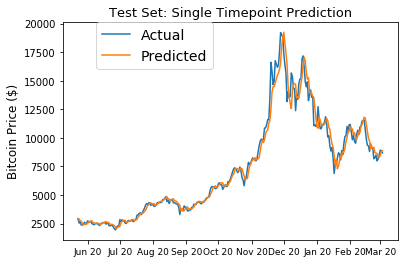

In [34]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(2017+j,i+1,20)for j in range(2) for i in range(12)])
ax1.set_xticklabels([datetime.date(2017+j,i+1,20).strftime('%b %d') for j in range(2) for i in range(12)],fontsize=9)
ax1.plot(model_data[model_data['DATE']>= split_date]['DATE'][10:].astype(datetime.datetime),
         test_set['LAST'][window_len:], label='Actual')
ax1.plot(model_data[model_data['DATE']>= split_date]['DATE'][10:].astype(datetime.datetime),
         ((np.transpose(bt_model.predict(LSTM_test_inputs))+1) * test_set['LAST'].values[:-window_len])[0], 
         label='Predicted')
#ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(bt_model.predict(LSTM_test_inputs))+1)-\
            #(test_set['LAST'].values[window_len:])/(test_set['LAST'].values[:-window_len]))), 
             #xy=(0.75, 0.9),  xycoords='axes fraction',
            #xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()

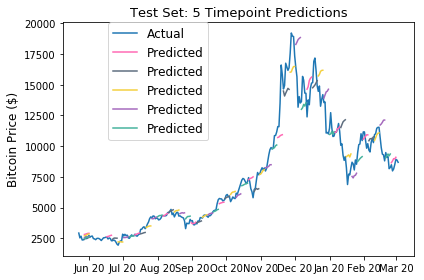

In [35]:
# little bit of reformatting the predictions to closing prices

bt_pred_prices = ((bt_model.predict(LSTM_test_inputs)[:-pred_range][::pred_range]+1)*\
                   test_set['LAST'].values[:-(window_len + pred_range)][::5].reshape(int(np.ceil((len(LSTM_test_inputs)-pred_range)/float(pred_range))),1))

pred_colors = ["#FF69B4", "#5D6D7E", "#F4D03F","#A569BD","#45B39D"]
fig, (ax1) = plt.subplots(1,1)
ax1.set_xticks([datetime.date(2017+j,i+1,20)for j in range(2) for i in range(12)])
ax1.set_xticklabels([datetime.date(2017+j,i+1,20).strftime('%b %d')for j in range(2)  for i in range(12)])
ax1.plot(model_data[model_data['DATE']>= split_date]['DATE'][window_len:].astype(datetime.datetime),
         test_set['LAST'][window_len:], label='Actual')
for i, (bt_pred) in enumerate(bt_pred_prices):
    # Only adding lines to the legend once
    if i<5:
        ax1.plot(model_data[model_data['DATE']>= split_date]['DATE'][window_len:].astype(datetime.datetime)[pred_range:pred_range+pred_range],
                 bt_pred, color=pred_colors[i%5], label="Predicted")
    else: 
        ax1.plot(model_data[model_data['DATE']>= split_date]['DATE'][window_len:].astype(datetime.datetime)[i*pred_range:i*pred_range+pred_range],
                 bt_pred, color=pred_colors[i%5])
ax1.set_title('Test Set: 5 Timepoint Predictions',fontsize=13)
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.13, 1), loc=2, borderaxespad=0., prop={'size': 12})
fig.tight_layout()
plt.show()